In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline

C:\Users\12532\anaconda3\envs\bugs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\12532\anaconda3\envs\bugs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\12532\anaconda3\envs\bugs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


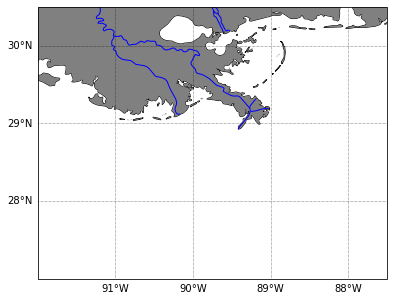

In [2]:
# Change this!
lat_top=30.5
lat_bot=27
lon_left=-92.
lon_rigth=-87.5
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [3]:
#making it a function

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

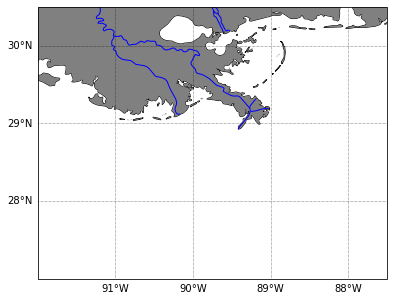

In [4]:
fig, ax = plot_mapbase(extent)

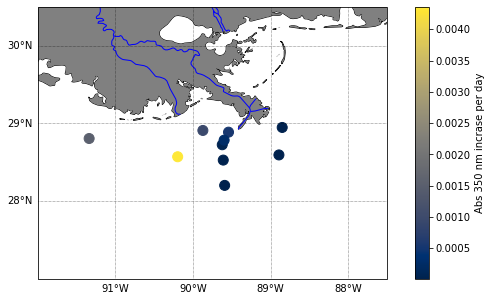

In [8]:
# Ploting data
# load your csv file
df = pd.read_csv('../Data_other/DATA_FOR_MAP.csv')
lons = df['Lon'] # or whatever name you have for longitude
lats = df['Lat'] # or whatever name you have for latitude
var = df['BC Flux 412'] #whatever variable you wanna plot as color
var2 = df['BC Flux 412 in WC '] #whatever variable you wanna plot as size
lab = df['Station']

# set the thigs above. I am making fake data for the example:
#lons = [ -96.2, -95.1, -94.4]
#lats = [28.45, 28.51, 29.1]
#var = [12.4, 13.5, 45.8]
#var2 = [.2, .7, .9]


fig, ax = plot_mapbase(extent)
mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var2,  #you color variable
#            vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= 'cividis', # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
            s=100, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())

#make the colorbar
cb = fig.colorbar(mappable)
cb.set_label('Abs 350 nm incrase per day')

In [10]:
path = '../Data_other/DATA_FOR_MAP.csv'
def load_satdata(path):
    data = xr.open_dataset(path, group='geophysical_data')
    navigation = xr.open_dataset(path, group='navigation_data')
    navigation = navigation.rename({'pixel_control_points': 'pixels_per_line'})
    mask = (~navigation['latitude'].isnull()) & (~navigation['longitude'].isnull())
    data = data.where(mask, drop=True)
    data['lat'] = navigation['latitude'].where(mask, drop=True)
    data['lon'] = navigation['longitude'].where(mask, drop=True)
    return data
ds = load_satdata(path)
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

NameError: name 'ds' is not defined

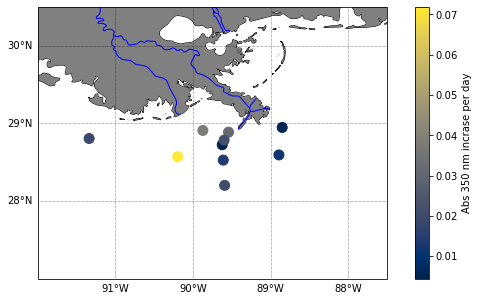

In [11]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset

fig, ax = plot_mapbase(extent)
mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var,  #you color variable
#            vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= 'cividis', # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
            s=100, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cb = fig.colorbar(mappable)
cb.set_label('Abs 350 nm incrase per day')
ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], transform=ccrs.PlateCarree())

In [1]:
# you could also plot your satelite data on top of this, after loading your netcdf dataset

fig, ax = plot_mapbase(extent)
satdata = ax.pcolormesh(ds['lon'], ds['lat'], ds['a_412_giop'], cmap='BuGn', transform=ccrs.PlateCarree())
cb = fig.colorbar(satdata)
cb.set_label('Aborption at 412 nm from satellite data')
mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var2,  #you color variable
#            vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= 'autumn', # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
            s=550, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())
cb2 = fig.colorbar(mappable)
cb2.set_label('Aborption at 412 nm incrase per day from sediment diffusive flux')
plt.title(label="Map of CDOM benthic flux and Satalite CDOM data")
fig.set_size_inches(18.5, 10.5)
fig.savefig('plot.png')

SyntaxError: invalid syntax (<ipython-input-1-80b7b159c8ba>, line 13)